In [1]:
library(ggplot2)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
df <- read.csv(file='hate-speech-and-offensive-language/results_2e-05_256_300.csv')

In [3]:
df$pred <- recode_factor(df$pred, `1` = "Neither", `0` = "Offensive", `2` = "Hate")
df$target <- recode_factor(df$target, `1` = "Neither", `0` = "Offensive", `2` = "Hate")

In [4]:
df %>% count(target)

target,n
Neither,432
Offensive,1902
Hate,130


In [5]:
str(df)

'data.frame':	2464 obs. of  6 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ text   : Factor w/ 2461 levels "' cause these hoes ain't loyal ! and niggahs ain't either ! when it go down you callin for <unk> that you <unk> <unk>",..: 700 2329 516 2201 593 2334 662 930 1016 158 ...
 $ length : int  3 3 3 3 3 3 3 3 3 3 ...
 $ pred   : Factor w/ 3 levels "Neither","Offensive",..: 2 2 2 2 2 1 2 1 2 2 ...
 $ target : Factor w/ 3 levels "Neither","Offensive",..: 2 2 2 2 1 1 2 2 2 2 ...
 $ correct: int  1 1 1 1 0 1 1 0 1 1 ...


In [6]:
df %>% group_by(pred, target) %>% summarize(n=n())

`summarise()` regrouping output by 'pred' (override with `.groups` argument)


pred,target,n
Neither,Neither,320
Neither,Offensive,102
Neither,Hate,18
Offensive,Neither,106
Offensive,Offensive,1764
Offensive,Hate,79
Hate,Neither,6
Hate,Offensive,36
Hate,Hate,33


In [7]:
df %>% group_by(target) %>% 
    mutate(n=n()) %>%
    group_by(target, pred) %>%
    mutate(prop = n()/n)

X,text,length,pred,target,correct,n,prop
0,<unk> pussy <unk>,3,Offensive,Offensive,1,1902,0.92744479
1,tickets hoe <unk>,3,Offensive,Offensive,1,1902,0.92744479
2,<unk> bitch tits,3,Offensive,Offensive,1,1902,0.92744479
3,shut up bitch,3,Offensive,Offensive,1,1902,0.92744479
4,<unk> hey <unk>,3,Offensive,Neither,0,432,0.24537037
5,top layer trash.,3,Neither,Neither,1,432,0.74074074
6,<unk> lol cracker,3,Offensive,Offensive,1,1902,0.92744479
7,da fuq ho,3,Neither,Offensive,0,1902,0.05362776
8,fuck off bitch,3,Offensive,Offensive,1,1902,0.92744479
9,@justkarahn negro please,3,Offensive,Offensive,1,1902,0.92744479


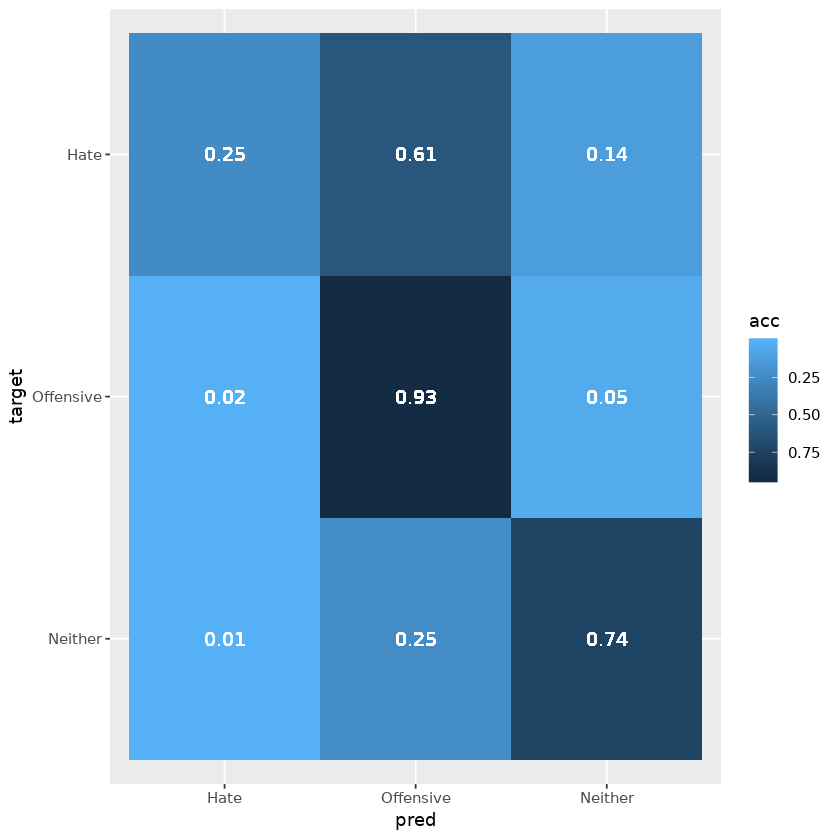

In [14]:
df %>% group_by(target) %>% 
    mutate(n=n()) %>%
    group_by(target, pred) %>%
    mutate(acc = n()/n) %>%

ggplot(aes(x=pred, y=target, fill=acc)) + 
    geom_tile() +
    scale_x_discrete(limits = rev(levels(df$pred))) +
    scale_fill_continuous(trans = 'reverse') +
    geom_text(aes(pred, target, label = round(acc, 2)), color = "white", size = 4) 


In [15]:
df %>% filter(target=="Offensive") %>% sample_n(20)

X,text,length,pred,target,correct
112,<unk> grade a pussy.,4,Offensive,Offensive,1
2104,"i don't get why bitches blame the hoe their man cheated on them <unk> was both their <unk> boyfriend could've said ""no""",22,Offensive,Offensive,1
1280,@felicity182 a pussy in ur mouth is a really good stress <unk> doctors recommend,14,Offensive,Offensive,1
134,dumb ass bitch i swear,5,Offensive,Offensive,1
1508,"rt @datdudetorey: <unk> that ""boss ass bitch"" song got <unk> thinking they're models lmao <unk> &#128514;&#128514;&#128514;&#128514;&#128514;",16,Offensive,Offensive,1
1320,@wodaeeex3 bitch i ainn <unk> i go str8 to class my teacher lame af,14,Offensive,Offensive,1
2224,everything don't deserve a <unk> so don't think because you do something that i'm <unk> bitch i'm <unk> on money not your sad ass,24,Offensive,Offensive,1
1135,@yobritttany i didn't know that was a fad sounds fucking retarded haha,12,Offensive,Offensive,1
1472,i have such a horrible perspective of time. i think i might be retarded smh,15,Hate,Offensive,0
369,"<unk> he's gone always be a hoe""",7,Offensive,Offensive,1


In [9]:
df %>% filter(target=="Hate", pred=="Offensive") %>% sample_n(20)

X,text,length,pred,target,correct
2149,"@_iamken fuck brett <unk> redneck ass, he <unk> he don't give a damn lol he be on campus acting like he the shit",23,Offensive,Hate,0
1945,@grizzboadams fucking block your white ass because you try to start shit like a fucking queer so fuck you nigga,20,Offensive,Hate,0
1547,<unk> this is awkward u fag <unk> <unk> <unk> wonder who's awesome tank that is &#128522;,16,Offensive,Hate,0
1238,<unk> i don't follow you because everything about your company is white trash.,13,Offensive,Hate,0
424,rt <unk> hoes will be hoes .,7,Offensive,Hate,0
1386,"<unk> niggas probably be watching me like ""look at this uncle tom ass <unk>",14,Offensive,Hate,0
1064,<unk> that bitch done.. have it to u on sunday my nigga,12,Offensive,Hate,0
937,"@realdonaldtrump he looks like reg. memphis,tn. trash! we got them everywhere.",11,Offensive,Hate,0
1782,"<unk> white, aren't you? *rolls <unk> rt <unk> <unk> rip to my nigga <unk> a worthless spear chucker",18,Offensive,Hate,0
109,@maxwell_larsen your a cunt,4,Offensive,Hate,0


In [10]:
df %>% filter(target=="Hate", pred=="Neither") %>% sample_n(10)

X,text,length,pred,target,correct
2252,"if some one isn't an anglo-saxon <unk> they have no right to be alive in the us. none at all, they are foreign filth.",24,Neither,Hate,0
620,@misplaced_momma y&#8217;all whitey gots to pay fo da <unk>,9,Neither,Hate,0
1482,roman <unk> in the us are trash. they give <unk> in europe a bad name.,15,Neither,Hate,0
2114,<unk> <unk> you have a redneck attitude. the same people that think <unk> is real think fox fake <unk> is real. your one,23,Neither,Hate,0
84,elizabeth is <unk> hoe.,4,Neither,Hate,0
1627,dis broad done tagged dis nicca n a video of his sis giving dome .. <unk>,16,Neither,Hate,0
1148,people who grow their own vegetables are nothing but common <unk> trash.,12,Neither,Hate,0
2031,@dish_answers you gots da bet and da msnbc wit dat colored <unk> who only listen to <unk> what else i <unk>,21,Neither,Hate,0
1504,"@erinscafe we hate the yankees though, right? i feel like i'm really good at hating them.",16,Neither,Hate,0
2416,@bitchkrieg like the new avi. my twitter is retarded and shows you in the cubs hat but when i stalk your profile it show the new one,27,Neither,Hate,0


In [208]:
df %>% filter(target=="Offensive", pred=="Hate") %>% sample_n(10)

X,text,length,pred,target,correct
564,@pretty_warzone <unk> caught it the first time nigger,8,Hate,Offensive,0
1481,rt <unk> chance. acid rapper. soccer <unk> cocky khaki jacket <unk> slap happy faggot <unk>,15,Hate,Offensive,0
1198,@sramirez07943 you're <unk> at that and you don't know where i live faggot,13,Hate,Offensive,0
350,<unk> @chanelisabeth shut up fuckin beaner,6,Hate,Offensive,0
882,i want to paint but faggot won't paint with me...,10,Hate,Offensive,0
221,<unk> while you hatin bitch.,5,Hate,Offensive,0
671,"@riwhey_000 i'm just kidding, i'm not a fucking faggot",9,Hate,Offensive,0
463,rt <unk> i inhale white <unk> nigger,7,Hate,Offensive,0
223,@mikeb_in_the_d rams are for fags,5,Hate,Offensive,0
356,<unk> i'm a fucking fag they <unk>,7,Hate,Offensive,0


In [209]:
df %>% filter(target=="Neither", pred=="Hate") %>% sample_n(6)

X,text,length,pred,target,correct
1349,<unk> would've easily drained all these shots with us. he's so trash now smh,14,Hate,Neither,0
691,<unk> yeah one called me a race traitor lol,9,Hate,Neither,0
1326,<unk> <unk> can't call white trash women white trash like this during <unk> #htgawm,14,Hate,Neither,0
50,@mis_sarahd @basedpapi1017 tranny,3,Hate,Neither,0
562,"country boy, hick <unk> white tee, rebel flag",8,Hate,Neither,0
48,this brownies bro,3,Hate,Neither,0


In [210]:
df %>% filter(target=="Neither", pred=="Offensive") %>% sample_n(10)

X,text,length,pred,target,correct
790,rt <unk> keys open doors when them keys is albino,10,Offensive,Neither,0
773,rt <unk> when you has a <unk> eats a brownie,10,Offensive,Neither,0
1804,"poor <unk> he's supporting the right <unk> of you guys all on his <unk> don't hurt it, <unk> <unk>",19,Offensive,Neither,0
1927,rt <unk> you know you're ugly when an ape was chosen as a man crush and you've never been <unk>,20,Offensive,Neither,0
268,i'm jus a trill nicca mane,6,Offensive,Neither,0
581,<unk> got it! thanks <unk> ima text u,8,Offensive,Neither,0
908,<unk> negative slopes aka a <unk> of my grades in math,11,Offensive,Neither,0
60,&#128075; <unk> <unk>,3,Offensive,Neither,0
1062,rt <unk> <unk> not only you. and that pom <unk> totally porn.,12,Offensive,Neither,0
2086,saw 5 pick up a dime off the floor with her toes. apparently my <unk> <unk> gene is strong with that one.,22,Offensive,Neither,0
